In [47]:
import numpy as np
import math
import time
from scipy.stats import expon
from scipy.stats import uniform
from scipy.stats import chi2
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import spearmanr #for checking Spearman test
from scipy.stats import kendalltau #for checking Kendall test
from statsmodels.sandbox.stats.runs import runstest_1samp  #for checking randomness test

In [48]:
def gen_expon_values(n, lambd):
    vals = np.random.exponential(scale=1.0/lambd, size=n)
    return vals

def gen_unif_values(n, a, b):
    return np.random.uniform(low=a, high=b, size=n)

def make_hist(X, Xname, n, Y, Yname, m):
    figure, axis = plt.subplots(1, 2, figsize=(8,2.5))
    axis[0].hist(X, 30, density = True)
    axis[0].set_title(f"{Xname}: {n} спостережень")
    axis[1].hist(Y, 30, density = True)
    axis[1].set_title(f"{Yname}: {m} спостережень")
    plt.show()

In [49]:
gamma = 0.05 #рівень значимості
Z_gamma = 1.96

### Завдання 1. Перевірка гіпотези однорідності: критерій пустих блоків.
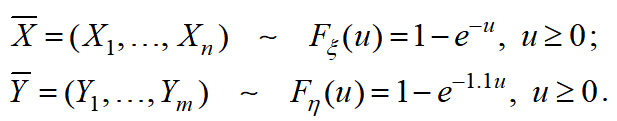

In [50]:
def empty_box_test_2samp(X, n, Y, m, gamma):
    print("Z_gamma=", Z_gamma)
    X_ord = np.sort(X) #order statistics
    X_ord = np.insert(X_ord, 0, float("-inf"))
    X_ord = np.append(X_ord, float("+inf"))
    v = np.histogram(Y, bins = X_ord)[0]
    k = np.sum(np.array(v) == 0)
    ro = m/n
    bound = n/(1+ro) + np.sqrt(n)*ro*Z_gamma/pow((1+ro), 1.5)
    print("k=", k)
    print("bound=", bound)
    if k < bound:
        print("Ho ACCEPTED")
    else:
        print("Ho REJECTED")    

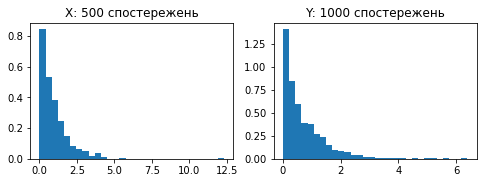

Z_gamma= 1.96
k= 164
bound= 183.5356607968145
Ho ACCEPTED


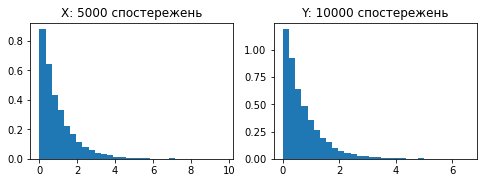

Z_gamma= 1.96
k= 1723
bound= 1720.011109953945
Ho REJECTED


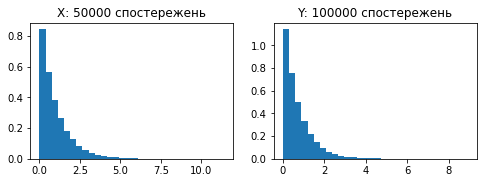

Z_gamma= 1.96
k= 17608
bound= 16835.356607968148
Ho REJECTED


In [54]:
n_m = [[500, 1000], [5000, 10000], [50000, 100000]]
lambd_real_X = 1 #яка насправді
lambd_real_Y = 1.4

for n_i, m_i in n_m:
    X = gen_expon_values(n_i, lambd_real_X)
    Y = gen_expon_values(m_i, lambd_real_Y)
    make_hist(X, 'X', n_i, Y, 'Y', m_i)
    empty_box_test_2samp(X, n_i, Y, m_i, gamma)

### Завдання 2. Перевірка гіпотези незалежності
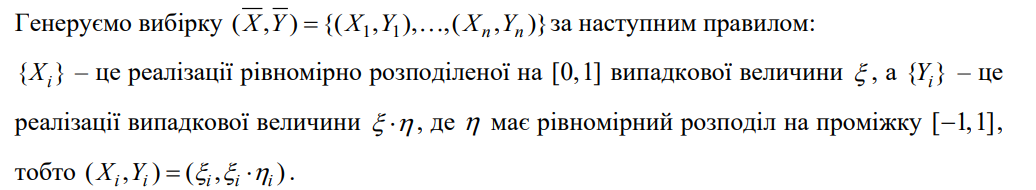
### A. Критерій Спірмена

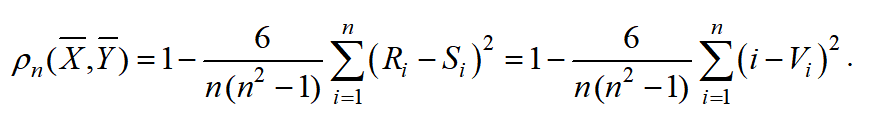

In [38]:
def gen_X_Y(n):
    X = gen_unif_values(n, 0, 1)
#     eta = gen_unif_values(n, -1, 1)
    eta = np.random.normal(-1, 1, n)
    Y = X * eta
    return X, Y

def spearman_rank_test(V, n, gamma):    
    summ = np.array([(i+1 - V[i]) for i in range(n)])
    summ = np.sum(summ ** 2)
    
    ro = 1 - summ * (6/(n*(n**2 - 1)))
    print("|ro|=", abs(ro))
    print("Z_gamma=", Z_gamma)
    print("Z/ sqrt(n)=", Z_gamma/np.sqrt(n))
    
    if abs(ro) < Z_gamma/math.sqrt(n):
        print("Ho ACCEPTED")
    else:
        print("Ho REJECTED")
        
    coef, p = spearmanr(X, Y)
    print("scipy: |ro|=", abs(coef), "p=", p)

### B. Критерій Кендалла
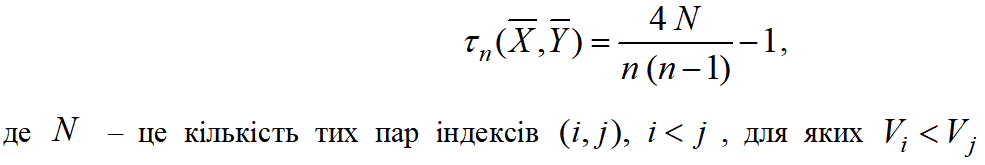

In [39]:
####### Merge Sort щоб ефективно порахувати N ##############
def MergeAndCountSplitInv(A, L, R):
    M = []
    i = 0
    j = 0
    c = 0 #number of split inversions
    for k in range(len(L) + len(R)):
        if len(L) > i and len(R) > j:
            if L[i] <= R[j]:
                M.append(L[i])
                i += 1
            else:
                M.append(R[j])
                j += 1
                c += (len(L) - i)
        elif len(L)<= i:
            M.append(R[j])
            j += 1
        elif len(R)<= j:
            M.append(L[i])
            i += 1
    return M, c

def SortAndCountInv(A):
    if len(A) == 1:
        return A, 0
    else:
        n2 = int(len(A)/2)
        La = A[:n2]
        Ra = A[n2:]
        L, x = SortAndCountInv(La)
        R, y = SortAndCountInv(Ra)
        A, z = MergeAndCountSplitInv(A, L, R)
        return A, x + y + z
    
def get_N(V):
    inv = SortAndCountInv(V)[1]
    l = len(V)
    allpairs = l*(l-1)/2
    res = allpairs-inv
    return res

In [40]:
def kendall_rank_test(V, n, gamma):
    N = int(get_N(V))
    print("N=", N)
    tau = (4*N/(n*(n-1))) - 1
    print("|tau|=", abs(tau)) 
    print("Z_gamma=", Z_gamma)
    print("2/3 * Z_gamma/sqrt(n)=", 2*Z_gamma/(3*math.sqrt(n)))
    if abs(tau) < 2*Z_gamma/(3*math.sqrt(n)):
        print("Ho ACCEPTED")
    else:
        print("Ho REJECTED")
        
    coef, p = kendalltau(X, Y)
    print("scipy: |tau|=", abs(coef), "p=", p)

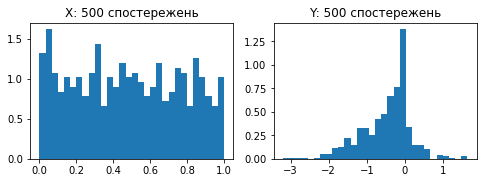


 Критерій Спірмена
|ro|= 0.47547348589394356
Z_gamma= 1.96
Z/ sqrt(n)= 0.08765386471799175
Ho REJECTED
scipy: |ro|= 0.47547348589394356 p= 1.442353575668897e-29
--------------------------------

 Критерій Кендалла
N= 39427
|tau|= 0.36790380761523045
Z_gamma= 1.96
2/3 * Z_gamma/sqrt(n)= 0.058435909811994494
Ho REJECTED
scipy: |tau|= 0.3679038076152304 p= 9.421168976112475e-35


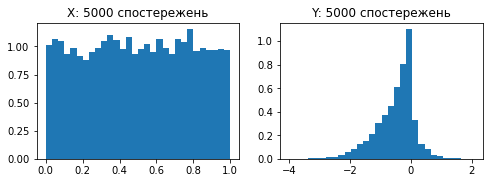


 Критерій Спірмена
|ro|= 0.45850869744434797
Z_gamma= 1.96
Z/ sqrt(n)= 0.027718585822512663
Ho REJECTED
scipy: |ro|= 0.45850869744434786 p= 1.7563781856243399e-258
--------------------------------

 Критерій Кендалла
N= 4111907
|tau|= 0.34196327265453086
Z_gamma= 1.96
2/3 * Z_gamma/sqrt(n)= 0.01847905721500844
Ho REJECTED
scipy: |tau|= 0.3419632726545309 p= 7.435858152068607e-288


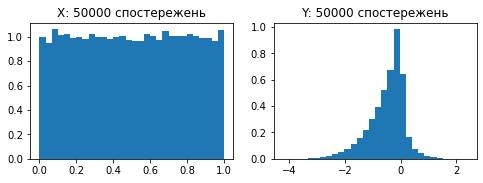


 Критерій Спірмена
|ro|= 0.46438424050415383
Z_gamma= 1.96
Z/ sqrt(n)= 0.008765386471799176
Ho REJECTED
scipy: |ro|= 0.4643842405041537 p= 0.0
--------------------------------

 Критерій Кендалла
N= 409841917
|tau|= 0.3442398175963519
Z_gamma= 1.96
2/3 * Z_gamma/sqrt(n)= 0.005843590981199451
Ho REJECTED
scipy: |tau|= 0.34423981759635197 p= 0.0


In [55]:
import pandas as pd


n = [500, 5000, 50000]
# n = [500]
for n_i in n:
    X, Y = gen_X_Y(n_i)
    xy_df = pd.DataFrame({'X':X, 'Y': Y})
    xy_df.to_csv("xy.csv")
    
    make_hist(X, 'X', n_i, Y, 'Y', n_i)
#     plt.scatter(X, Y)
    X_ord = list(np.sort(X))
    Y_ord = list(np.sort(Y))
    R = np.array([X_ord.index(X[i])+1 for i in range(n_i)]) #rang x
    S = np.array([Y_ord.index(Y[i])+1 for i in range(n_i)]) #rang y
    V = np.array(list(S[R.argsort()])).astype('int64')
    
    print("\n Критерій Спірмена")
    spearman_rank_test(V, n_i, gamma)
    print("--------------------------------")
    print("\n Критерій Кендалла")
    kendall_rank_test(V, n_i, gamma)

### Завдання 3. Перевірка гіпотези випадковості.
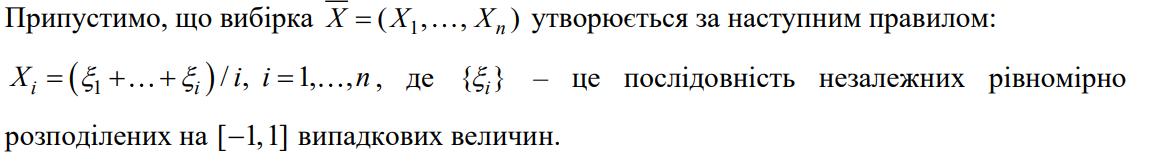
#### Перевірити гіпотезу випадковості за допомогою критерію, що ґрунтується на обчисленні кількості інверсій

In [58]:
def gen_X(n):
    ksi = gen_unif_values(n, -1, 1)
    X = [np.sum(ksi[:i])/i for i in range(1, n+1)]
    return X

def randomness_test(X, n, gamma):
    k = SortAndCountInv(X)[1]
    print("number of inversions=", k)
    bound = (6/(n*math.sqrt(n)))*abs(k - n*(n-1)/4)
    print("z_gamma=", Z_gamma)
    print("bound=", bound)
    if bound <= Z_gamma:
        print("Ho ACCEPTED")
    else:
        print("Ho REJECTED")    
    z_test, pvalue = runstest_1samp(X, correction=False)
    print("\nruns test: pvalue=", pvalue)
    print("Ho REJECTED" if pvalue < gamma else "Ho ACCEPTED")

In [59]:
n = [500, 5000, 50000]
for n_i in n:
    print("n=", n_i)
    X = gen_X(n_i)
    randomness_test(X, n_i, gamma)
    print("--------------------------------------")

n= 500
number of inversions= 38208
z_gamma= 1.96
bound= 12.969373154936982
Ho REJECTED

runs test: pvalue= 2.1554139070473587e-73
Ho REJECTED
--------------------------------------
n= 5000
number of inversions= 1515266
z_gamma= 1.96
bound= 80.32988724091257
Ho REJECTED

runs test: pvalue= 0.0
Ho REJECTED
--------------------------------------
n= 50000
number of inversions= 828032912
z_gamma= 1.96
bound= 108.96560250034837
Ho REJECTED

runs test: pvalue= 0.0
Ho REJECTED
--------------------------------------
